# Homework 3

**Bootstrap and Testing**

## Task 1
1. Test the hypothesis that the survival rates for female passengers in Pclass 1 was no larger than in Pclass 2.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Titanic data:
titanic = sns.load_dataset('titanic')

calculating t-statistic
$$t = \frac{\bar{x} - \mu_0}{\hat{\sigma}/\sqrt{n}}$$

point-estimate

$$p_e = p_1 -p_2 $$

H0 = p_pclass1 =< p_pclass2 -> p1 - p2 <= 0

H1 = p_pclass1 > p_class2 -> p1-p2 > 0

-> one sided test 

In [4]:
#Get an overview over the means with the groupby function
fem_titanic_classes = titanic[(titanic["sex"] == "female") & (titanic["pclass"] < 3)].loc[:, ["survived","pclass"]]
groups = fem_titanic_classes.groupby(["pclass"]).mean()

#Get an overview over the absolute numbers with a crosstab
tab = pd.crosstab(fem_titanic_classes["pclass"],fem_titanic_classes["survived"])

print("groupby:" , groups, "\n \n", "crosstab: \n ", tab)

groupby:         survived
pclass          
1       0.968085
2       0.921053 
 
 crosstab: 
  survived  0   1
pclass         
1         3  91
2         6  70


In [5]:
#Define needed variables
pclass1 = fem_titanic_classes[fem_titanic_classes["pclass"] ==1]
pclass1_surv = pclass1["survived"]
pclass1_mean = np.mean(pclass1_surv)
pclass2 = fem_titanic_classes[fem_titanic_classes["pclass"] ==2]
pclass2_surv = pclass2["survived"]
pclass2_mean = np.mean(pclass2_surv)

#Calculate the point estimate
point_est = pclass1_mean - pclass2_mean 
point_est

0.04703247480403139

In [6]:
def permutation_sample(group_a, group_b):
    """computes a permutation sample for two groups"""
    combine = np.concatenate((group_a, group_b))
    
    #draw the permutation sample for the combined group and split into the same group lengths as before
    permutation = np.random.permutation(combine)
    permutation_a = permutation[:len(group_a)] #selects an array according to the length of group a
    permutation_b = permutation[len(group_a):] #selects the remaining array for group b (therefore, automatically the length of group b)
    
    return permutation_a, permutation_b

In [7]:
np.random.seed(1)
#Calculate results from chance alone
#permutate bootstrap the samples to find results by chance alone

M = 10000 #specify how many bootstrap samples should be drawn
diff_perm1 = np.empty((M, len(pclass1_surv)))
diff_perm2 = np.empty((M, len(pclass2_surv)))
perm_point_ests = np.empty(M)
for i in range(M):
    perm_p1, perm_p2 = permutation_sample(pclass1_surv, pclass2_surv)
        
    hits_perm_p1 = np.count_nonzero(perm_p1 == 0)
    length_pclass1_surv = len(perm_p1)
    
    # calculates the amount of true element in b and b's size
    hits_perm_p2 = np.count_nonzero(perm_p2 == 0)
    length_pclass2_surv = np.size(perm_p2)
    
    # calculates point estimate
    point_estimate = (hits_perm_p1/length_pclass1_surv - hits_perm_p2/length_pclass2_surv)
    perm_point_ests[i] = point_estimate
    diff_perm1[i] = perm_p1
    diff_perm2[i] = perm_p2

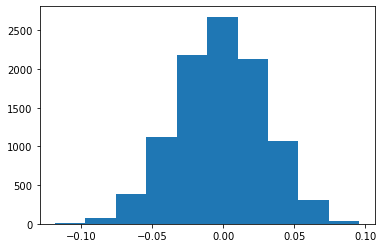

In [8]:
obs_chance = np.sum(np.array(perm_point_ests) >= point_est) / len(perm_point_ests) * 100
plt.hist(perm_point_ests);

In [9]:
#Get number of survivors for pclass1 and pclass2
perm_p1_mean = np.mean(diff_perm1, axis = 1) 
perm_p2_mean = np.mean(diff_perm2, axis = 1) 
#Calculate the difference from the bootstrapped samples (point estimate of bootstrap sample)
diff_perm = perm_p1_mean - perm_p2_mean

#Filter for how many have an observed difference higher than 
observed = []
for element in diff_perm:
    if element >= point_est: #Only point estimates due to chance where the element is higher or equal than the observed point estimate do support the hypothesis
        observed.append(True)
    else:
        observed.append(False)
obs_array = diff_perm[observed]

#calculate the propability of finding the results by poor chance
obs_chance = round((len(obs_array) / len(diff_perm))*100, 3)
#alternative:
#obs_chance = np.sum(np.array(diff_perm) >= point_est) / len(diff_perm) * 100

print("There is a " + str(obs_chance) +"% Chance that the difference in survival-rate between pclass1 and pclass2 is entirely due to chance")

There is a 15.92% Chance that the difference in survival-rate between pclass1 and pclass2 is entirely due to chance


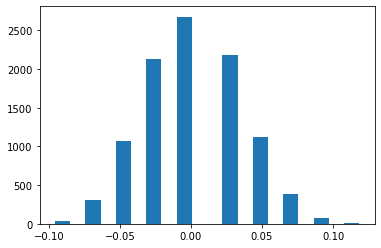

In [10]:
plt.hist(diff_perm, bins = 20);

## Answer Task1, Approach 1:
Given the chance of ~16% that the difference is purely due to chance, H0 can not be rejected.

In [11]:
#empty row, so you can tell where approach 2 begins :)

Approach 2: Approach the task with t-tests (difference in mean between groups)

$$t = \frac{\bar{x} - \mu_0}{\hat{\sigma}/\sqrt{n}}$$

H0 = p_pclass1 =< p_pclass2 -> µ1 - µ2 <= 0

H1 = p_pclass1 > p_class2 -> µ1-µ2 > 0

-> one sided test 

In [12]:
#Define needed variables
em_titanic_classes = titanic[(titanic["sex"] == "female") & (titanic["pclass"] < 3)].loc[:, ["survived","pclass"]]
pclass1 = fem_titanic_classes[fem_titanic_classes["pclass"] ==1]
pclass1_surv = pclass1["survived"]
pclass1_mean = np.mean(pclass1_surv)
pclass2 = fem_titanic_classes[fem_titanic_classes["pclass"] ==2]
pclass2_surv = pclass2["survived"]
pclass2_mean = np.mean(pclass2_surv)

In [13]:
#Compute all needed variables
x_bar = pclass1_mean
sigma = np.std(pclass1_surv)
n = len(pclass1_surv)
µ0 = pclass2_mean
print("x_bar =" + str(x_bar), "\nsigma =" + str(sigma), "\nµ0 = "+str(µ0), "\nn = " + str(n))

x_bar =0.9680851063829787 
sigma =0.17577352810487537 
µ0 = 0.9210526315789473 
n = 94


In [14]:
#given n>50 we use normal distribution instead of t distribution for the critical value 
from scipy.stats import norm
# that is the critical value that we compare our test statistic with
print('one-sided cv: ',norm.ppf(1-0.01))

one-sided cv:  2.3263478740408408


In [15]:
#Calcualte observed t-value
t = (x_bar - µ0)/(sigma / np.sqrt(n))
#Calculate the significance value
p = 1-norm.cdf(t)

print("with an observed t-value of t: " + str(t) + " and an calculated significance of p: " 
      + str(round(p,3)), "the difference between the groups is significant")

with an observed t-value of t: 2.5942288717776507 and an calculated significance of p: 0.005 the difference between the groups is significant


## Answer Task1, Approach 2:
Given a t-value that is higher than the calculated one-sided critical value,  the difference between the two groups is significant and H0 can be rejected

## Task2
2. Create a boxplot `mpg ~ cylinders`. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?

H0: µ_cyl_4 = µ_cyl_3 -> p4 - p3 = 0


H1: µ_cyl_4 != µ_cyl_3 -> p4 - p3 != 0

-> two-sided

In [16]:
#Auto data:
cars = pd.read_csv(r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\data\Auto.csv")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


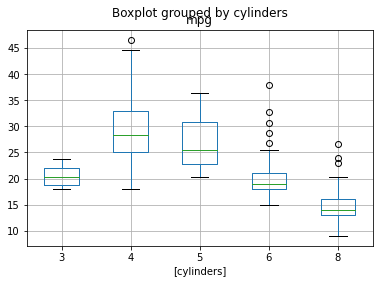

In [17]:
boxplot = cars[["cylinders","mpg"]].boxplot(by="cylinders")

In [18]:
#Calculated arrays only containing of cylinders and mpg
cyls = cars[(cars["cylinders"] > 2) & (cars["cylinders"] < 5)]
cyl_3 = cars[cars["cylinders"] == 3]
cyl_3_mpg = cyl_3["mpg"]
cyl_4 = cars[cars["cylinders"] == 4]
cyl_4_mpg = cyl_4["mpg"]
#Calculate the mean mpg for 3 & 4 cylinders
cyl_3_mean = np.mean(cyl_3_mpg)
cyl_4_mean = np.mean(cyl_4_mpg)

#calculate the point estimate
pe_cyls = cyl_4_mean - cyl_3_mean
pe_cyls

8.733919597989956

In [19]:
#Approach#1: Bootstrap the found results and compare 95% CI
#bootstrap the samples to find results by chance alone
M = 10000 #specify how many bootstrap samples should be drawn
n = 100 #specify the length of every array
array_1 = np.zeros((M,n)) #empty array for 10000 bootstraps of length n1
array_2 = np.zeros((M,n)) #empty array for 10000 bootstraps of length n2
for i in range(M):
    array_1[i] = np.random.choice(cyl_3["mpg"], n)
    array_2[i] = np.random.choice(cyl_4["mpg"], n)

#Get mean of bootstrapped samples
arr1_mean = np.mean(array_1, axis = 1)
arr2_mean = np.mean(array_2, axis = 1)
#Get 95% CI of the bootstrapped samples
CI3cyl = np.percentile(arr1_mean,(2.5, 97.5))
CI4cyl = np.percentile(arr2_mean,(2.5, 97.5))
print(CI3cyl, CI4cyl)

[20.12  20.983] [28.211 30.402]


## Answer Task 2, Approach 1:
Given that the 95% CI do not overlap even remotely, it is clear that the means are not equal.

I am not sure, if this is the way to use bootstrap though, given that these results can be clearly seen from the boxplot. The bootstrap should only enhance the results and therefore make the difference between the two groups - that is already assessable by eye - even more obvious

In [20]:
#Approach#2: Calculate results from chance alone and calculate the share of results that were at least as strong as the point estimate

#get length of arrays
n3 = len(cyl_3)
n4 = len(cyl_4)

#bootstrap the samples to find results by chance alone
M = 100000 #specify how many bootstrap samples should be drawn
array_3 = np.zeros((M,n3)) #empty array for 10000 bootstraps of length n1
array_4 = np.zeros((M,n4)) #empty array for 10000 bootstraps of length n2
for i in range(M):
    array_3[i] = np.random.choice(cyls["mpg"], n3)
    array_4[i] = np.random.choice(cyls["mpg"], n4)

In [21]:
#Get number of survivors for 4cyls and 3cyls
array_mean3 = np.mean(array_3, axis=1) 
array_mean4 = np.mean(array_4, axis=1) 
#Calculate the difference from the bootstrapped samples (point estimate of bootstrap sample)
diff_boots2 = array_mean4 - array_mean3

#Filter for how many have an observed difference higher than 
observed2 = []
for element in diff_boots2:
    if element >= pe_cyls: #Only point estimates due to chance where the element is higher or equal than the observed point estimate do support the hypothesis
        observed2.append(True)
    else:
        observed2.append(False)
obs_array2 = diff_boots2[observed2]

#calculate the propability of finding the results by pure chance (x2 because its two-sided)
obs_chance2 = round((len(obs_array2) / len(diff_boots2))*100 *2, 8)

print("There is a " + str(obs_chance2) +"% chance that the difference in mpgs for cyl3 and cyl4 is entirely due to chance")

There is a 0.036% chance that the difference in mpgs for cyl3 and cyl4 is entirely due to chance


## Answer Task2, Approach 2:
The distribution found could only be replicated with a chance of 0.028% using the bootstrapping. Therefore, the null hypothesis can be rejected.

## Task 3
3. Can you think of more interesting hypotheses to test regarding the pregnancy data ?

Do firstborn weights have higher weight than second born babies?

H0 -> µ_1 = µ_2 -> pe_1 - pe_2 = 0


H1 -> µ_1 != µ_2 -> pe_1 - pe_2 != 0


-> two sided test

In [22]:
#pregnancy data:
#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
preg = pd.read_csv(r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\data\pregNSFG.csv.gz")

#only look at live births
live = preg[preg.outcome == 1]
live.head()

,Unnamed: 0,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [23]:
#same function as above, just brought it back so its easier to find 
def permutation_sample(group_a, group_b):
    """computes a permutation sample for two groups"""
    combine = np.concatenate((group_a, group_b))
    
    #draw the permutation sample for the combined group and split into the same group lengths as before
    permutation = np.random.permutation(combine)
    permutation_a = permutation[:len(group_a)] #selects an array according to the length of group a
    permutation_b = permutation[len(group_a):] #selects the remaining array for group b (therefore, automatically the length of group b)
    
    return permutation_a, permutation_b

In [24]:
#set up relevant variables
live_first = live[live["pregordr"] == 1]
lfir_wgt = live_first["totalwgt_lb"]
lfir_wgt = lfir_wgt.dropna()
live_second = live[live["pregordr"] == 2]
lsec_wgt = live_second["totalwgt_lb"]
lsec_wgt = lsec_wgt.dropna()

In [25]:
#calculate the point estimate
lfir_mean = np.mean(lfir_wgt)
lsec_mean = np.mean(lsec_wgt)

wgt_point_est = lfir_mean - lsec_mean
wgt_point_est

-0.11643937563428608

In [26]:
#permutate the samples to check how the distribution would be if only up to chance
M = 10000
arr_p1 = np.empty((M, len(lfir_wgt)))
arr_p2 = np.empty((M, len(lsec_wgt)))
for i in range(M):
    perm_first, perm_second = permutation_sample(lfir_wgt, lsec_wgt)
    arr_p1[i] = perm_first
    arr_p2[i] = perm_second
    
#calculate the means of the permutated array
mean_perm1_first = np.mean(arr_p1, axis = 1)
mean_perm1_second = np.mean(arr_p2, axis =1)
#calculate the point estimate given the distribution is purely up to chance
perm_point_est = mean_perm1_first - mean_perm1_second

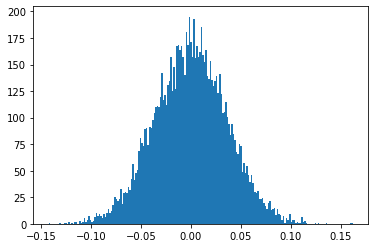

In [27]:
plt.hist(perm_point_est, bins = 200);

In [28]:
#Calculate the p-value
#Filter for how many have an observed difference higher than 
observed3 = []
for element in perm_point_est:
    if element <= wgt_point_est: #Only point estimates due to chance where the element is higher or equal than the observed point estimate do support the hypothesis
        observed3.append(True)
    else:
        observed3.append(False)
diff_found = perm_point_est[observed3]

#calculate the propability of finding the results by pure chance (x2 because its two-sided)
obs_chance3 = round((len(diff_found) / len(perm_point_est))*100 *2, 8)

print("There is a " + str(obs_chance3) +"% chance that the difference in survival-rate between pclass1 and pclass2 is entirely due to chance")

There is a 0.14% chance that the difference in survival-rate between pclass1 and pclass2 is entirely due to chance


## Answer Task3, Approach 1:
Given that in replicates based on purely random distributions, the result could only be replicated in 0.18% of the time, the H0 can be rejected. 

Approach 2: using a t-test

Do firstborn weights have higher weight than second born babies?

H0 -> µ_1 = µ_2 -> pe_1 - pe_2 = 0


H1 -> µ_1 != µ_2 -> pe_1 - pe_2 != 0


-> two sided test

In [29]:
#set up relevant variables
live_first = live[live["pregordr"] == 1]
lfir_wgt = live_first["totalwgt_lb"]
lfir_wgt = lfir_wgt.dropna()
live_second = live[live["pregordr"] == 2]
lsec_wgt = live_second["totalwgt_lb"]
lsec_wgt = lsec_wgt.dropna()

In [30]:
#define needed variables for t
x_bar_birth = np.mean(lfir_wgt)
sigma_birth = np.std(lfir_wgt)
µ0_birth = np.mean(lsec_wgt)
n_birth = len(lfir_wgt)
n_birth

3323

In [31]:
#Given a n value of n > 50, the critical t value is calculated with normal distribution
cv = norm.ppf(0.975)
#calculate the t-value
t_birth = (x_bar_birth - µ0_birth)/(sigma_birth / np.sqrt(n_birth))
#calculate the significance, since its a two-sided test, we gotta *2 the result
p_birth = norm.cdf(t_birth) * 2
print(cv, t_birth, p_birth)

1.959963984540054 -4.746424605276788 2.0704384900080017e-06


## Answer Task 3, Approach 2:

The birthweight between the first born and the second born differ significantly!


In [5]:
import numpy as np
sss_a = 6.08333
sss_r = 6.8344
SD = 1.583
n = 130

t = (sss_a - sss_r)/(SD / np.sqrt(n))
t

-5.409675025452994

In [12]:
from scipy.stats import norm
print('one-sided cv: ',norm.ppf(1-0.05))

one-sided cv:  1.6448536269514722
